# Shopify Data Science Intern Challenge - Satrajit Chatterjee

## Question 1

### Provided data: 

- Number of sneaker shops: **100**
- Initial average order value (AOV): **$3145.13**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/2019 Winter Data Science Intern Challenge Data Set.csv')

## Step 1: Analyzing the Structure of the Provided Data

This allows us to get an idea of which specific attributes to focus on when analyzing the data itself. 

In [3]:
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
data['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

In [5]:
data['total_items'].describe()

count    5000.00000
mean        8.78720
std       116.32032
min         1.00000
25%         1.00000
50%         2.00000
75%         3.00000
max      2000.00000
Name: total_items, dtype: float64

The data description confirms the fact that AOV is 3145.13. We can also note that the 75% percentile is at 390 but the max order amount is 704000. This means that there are obvious outliers that are causing the overall mean to be inflated. Similarly, there are orders where the total number of items are at 2000, which is much higher than the 75% percentile of 3 items. Visualizing this data gives us a better sense of the outlying entries in the dataset. 

## Step 2: Visualizing Outliers

Text(0.5, 1.0, 'Order amount without outliers')

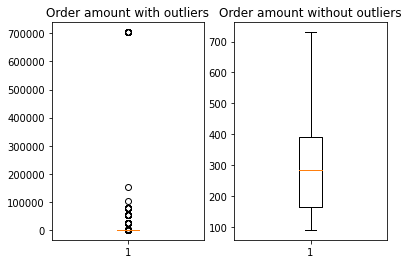

In [6]:
plt.subplot(1, 2, 1)
plt.boxplot(data['order_amount'], showfliers=True)
plt.title("Order amount with outliers")

plt.subplot(1, 2, 2)
plt.boxplot(data['order_amount'], showfliers=False)
plt.title("Order amount without outliers")

In [7]:
q_low = data['order_amount'].quantile(0.05)
q_hi  = data['order_amount'].quantile(0.95)
(q_low, q_hi)

(122.0, 640.0)

The box plots for `order_amount` confirm that there are outliers, where the graph has a much smaller range with `showfliers` set to `False`. Calculating the highest and lowest 5% percentiles, we can filter down the data to a much more reasonable range, in this case, between 122 and 640. 

Text(0.5, 1.0, 'Total items without outliers')

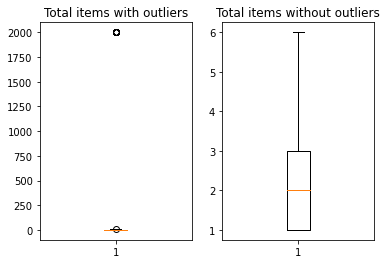

In [8]:
plt.subplot(1, 2, 1)
plt.boxplot(data['total_items'], showfliers=True)
plt.title("Total items with outliers")

plt.subplot(1, 2, 2)
plt.boxplot(data['total_items'], showfliers=False)
plt.title("Total items without outliers")

In [9]:
q_low = data['total_items'].quantile(0.05)
q_hi  = data['total_items'].quantile(0.95)
(q_low, q_hi)

(1.0, 4.0)

The box plots for `total_items` confirm that there are outliers, where the graph has a much smaller range with `showfliers` set to `False`. Calculating the highest and lowest 5% percentiles, we can filter down the data to a much more reasonable range, in this case, between 1 and 4. 

## Step 3: Tracking a New Dependent Variable - IOV

Individual Order Value, or IOV, is a new attribute introduced to the data, which represents the order amount over the total number of items that are part of an order. 

In [10]:
data['IOV'] = data.apply(lambda order: order.order_amount / order.total_items, axis=1)

Text(0.5, 1.0, 'IOV without outliers')

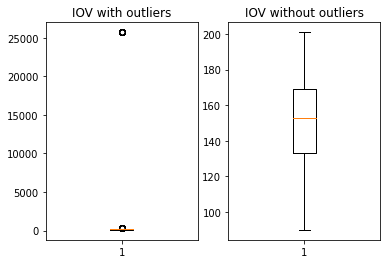

In [11]:
plt.subplot(1, 2, 1)
plt.boxplot(data['IOV'], showfliers=True)
plt.title("IOV with outliers")

plt.subplot(1, 2, 2)
plt.boxplot(data['IOV'], showfliers=False)
plt.title("IOV without outliers")

In [12]:
q_low = data['IOV'].quantile(0.05)
q_hi  = data['IOV'].quantile(0.95)
(q_low, q_hi)

(112.0, 195.0)

The middle 90% quantile of IOV ranges bewteen 112 and 195. This contributes to the factors when creating a reliable data filter. 

## Step 4: Data Filtering

Based on the outliers detection, it is clear that there are two major sets at play here. While there are some general outliers that must be filtered out for accurate calculations, there is some data with order amounts over 200000 that are large enough in number to be its own category, possibly for large businesses. The other general data falls in a second category for regular businesses. 

In [13]:
data_category_1 = data[(data['order_amount'] > 200000)]

In [14]:
"Filtered percentage of data category 1: " + str(round(len(data_category_1) / len(data) * 100, 2)) + "%"

'Filtered percentage of data category 1: 0.34%'

In [15]:
data_category_2 = data[(data['IOV'] <= 195) & (data['IOV'] >= 112) & 
                           (data['order_amount'] <= 640) & (data['order_amount'] >= 122) & 
                           (data['total_items'] <= 4) & (data['total_items'] >= 1)]

In [16]:
"Filtered percentage of data category 2: " + str(round(len(data_category_2) / len(data) * 100, 2)) + "%"

'Filtered percentage of data category 2: 85.42%'

The current filtering process can be used to categorize the data into two main sections, the first one representing 0.34% of the orders, for large businesses, and the second one representing 85.42% of the orders, for regular businesses. 

## Step 5: Conclusive Data

The description of the new data categories can now provide us with the correct AOVs.

In [17]:
data_category_1['order_amount'].describe()

count        17.0
mean     704000.0
std           0.0
min      704000.0
25%      704000.0
50%      704000.0
75%      704000.0
max      704000.0
Name: order_amount, dtype: float64

In [18]:
data_category_2['order_amount'].describe()

count    4271.000000
mean      293.501288
std       130.118069
min       122.000000
25%       164.000000
50%       284.000000
75%       374.000000
max       640.000000
Name: order_amount, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x287a57af490>,
 'caps': [<matplotlib.lines.Line2D at 0x287a57afa30>,
 'boxes': [<matplotlib.lines.Line2D at 0x287a57af1c0>],
 'medians': [<matplotlib.lines.Line2D at 0x287a57affd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x287a57bc2e0>],
 'means': []}

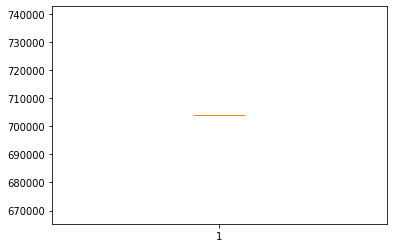

In [19]:
plt.boxplot(data_category_1['order_amount'], showfliers=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x287a67ed040>,
 'caps': [<matplotlib.lines.Line2D at 0x287a67ed5e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x287a67ddd30>],
 'medians': [<matplotlib.lines.Line2D at 0x287a67edb80>],
 'fliers': [<matplotlib.lines.Line2D at 0x287a67ede50>],
 'means': []}

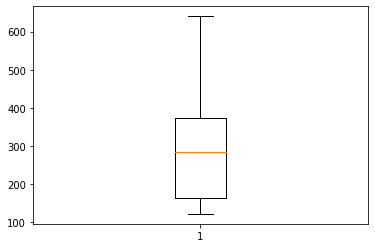

In [20]:
plt.boxplot(data_category_2['order_amount'], showfliers=True)

For each of the descriptions, the **means** define the AOVs. The AOVs for each of the categories are:
- *Regular businesses*: \$293.50
- *Large businesses*: \$704000.00

---